In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout, Input, Concatenate, Attention
from tensorflow.keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SPH6004/Pre-processed Static and Dynamic V2/Timestep5_train_cat0.csv')
test0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SPH6004/Pre-processed Static and Dynamic V2/Timestep5_test_cat0.csv')

In [ ]:
train0.columns

Index(['id', 'charttime', 'aniongap', 'bicarbonate', 'bun', 'calcium',
       'chloride', 'creatinine', 'glucose', 'sodium', 'potassium',
       'hematocrit', 'hemoglobin', 'mch', 'mchc', 'mcv', 'platelet', 'rbc',
       'rdw', 'wbc', 'inr', 'pt', 'ptt', 'hosp_admittime', 'hosp_dischtime',
       'icu_intime', 'icu_outtime', 'los_icu', 'icu_death', 'gender', 'race',
       'admission_age', 'weight_admit', 'height', 'charlson_score',
       'atrial_fibrillation', 'malignant_cancer', 'chf', 'ckd', 'cld', 'copd',
       'diabetes', 'hypertension', 'ihd', 'stroke', 'race_encode_African',
       'race_encode_Asian', 'race_encode_Caucasian', 'race_encode_Hispanic',
       'race_encode_Not Specified', 'race_encode_South American',
       'admission_type_DIRECT EMER.', 'admission_type_DIRECT OBSERVATION',
       'admission_type_ELECTIVE', 'admission_type_EU OBSERVATION',
       'admission_type_EW EMER.', 'admission_type_OBSERVATION ADMIT',
       'admission_type_SURGICAL SAME DAY ADMISSION', '

In [ ]:
s_train0 = train0[['id','los_icu', 'gender',
       'admission_age', 'weight_admit', 'height', 'charlson_score',
       'atrial_fibrillation', 'malignant_cancer', 'chf', 'ckd', 'cld', 'copd',
       'diabetes', 'hypertension', 'ihd', 'stroke', 'race_encode_African',
       'race_encode_Asian', 'race_encode_Caucasian', 'race_encode_Hispanic',
       'race_encode_Not Specified', 'race_encode_South American',
       'admission_type_DIRECT EMER.', 'admission_type_DIRECT OBSERVATION',
       'admission_type_ELECTIVE', 'admission_type_EU OBSERVATION',
       'admission_type_EW EMER.', 'admission_type_OBSERVATION ADMIT',
       'admission_type_SURGICAL SAME DAY ADMISSION', 'admission_type_URGENT',
       'first_careunit_Cardiac Vascular Intensive Care Unit (CVICU)',
       'first_careunit_Coronary Care Unit (CCU)',
       'first_careunit_Medical Intensive Care Unit (MICU)',
       'first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU)',
       'first_careunit_Neuro Intermediate', 'first_careunit_Neuro Stepdown',
       'first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU)',
       'first_careunit_Surgical Intensive Care Unit (SICU)',
       'first_careunit_Trauma SICU (TSICU)']]
s_test0 = test0[['id','los_icu', 'gender',
       'admission_age', 'weight_admit', 'height', 'charlson_score',
       'atrial_fibrillation', 'malignant_cancer', 'chf', 'ckd', 'cld', 'copd',
       'diabetes', 'hypertension', 'ihd', 'stroke', 'race_encode_African',
       'race_encode_Asian', 'race_encode_Caucasian', 'race_encode_Hispanic',
       'race_encode_Not Specified', 'race_encode_South American',
       'admission_type_DIRECT EMER.', 'admission_type_DIRECT OBSERVATION',
       'admission_type_ELECTIVE', 'admission_type_EU OBSERVATION',
       'admission_type_EW EMER.', 'admission_type_OBSERVATION ADMIT',
       'admission_type_SURGICAL SAME DAY ADMISSION', 'admission_type_URGENT',
       'first_careunit_Cardiac Vascular Intensive Care Unit (CVICU)',
       'first_careunit_Coronary Care Unit (CCU)',
       'first_careunit_Medical Intensive Care Unit (MICU)',
       'first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU)',
       'first_careunit_Neuro Intermediate', 'first_careunit_Neuro Stepdown',
       'first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU)',
       'first_careunit_Surgical Intensive Care Unit (SICU)',
       'first_careunit_Trauma SICU (TSICU)']]
d_train0 = train0[['id', 'charttime', 'aniongap', 'bicarbonate', 'bun', 'calcium',
       'chloride', 'creatinine', 'glucose', 'sodium', 'potassium',
       'hematocrit', 'hemoglobin', 'mch', 'mchc', 'mcv', 'platelet', 'rbc',
       'rdw', 'wbc', 'inr', 'pt', 'ptt']]
d_test0 = test0[['id', 'charttime', 'aniongap', 'bicarbonate', 'bun', 'calcium',
       'chloride', 'creatinine', 'glucose', 'sodium', 'potassium',
       'hematocrit', 'hemoglobin', 'mch', 'mchc', 'mcv', 'platelet', 'rbc',
       'rdw', 'wbc', 'inr', 'pt', 'ptt']]

In [ ]:
s_train0 = s_train0[0::5]
s_test0 = s_test0[0::5]
print(s_test0.shape)

(1785, 40)


In [ ]:
d_train0.columns

Index(['id', 'charttime', 'aniongap', 'bicarbonate', 'bun', 'calcium',
       'chloride', 'creatinine', 'glucose', 'sodium', 'potassium',
       'hematocrit', 'hemoglobin', 'mch', 'mchc', 'mcv', 'platelet', 'rbc',
       'rdw', 'wbc', 'inr', 'pt', 'ptt'],
      dtype='object')

In [ ]:
y_train0 = s_train0['los_icu'].values
y_test0 = s_test0['los_icu'].values
X_train0 = s_train0.drop(columns=['id','los_icu'], axis=1)
X_test0 = s_test0.drop(columns=['id','los_icu'], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_numeric = X_train0.select_dtypes(exclude=['object','datetime'])
#X_holdout_numeric = X_holdout.select_dtypes(exclude=['object','datetime']).drop(columns=['id'])
X_test_numeric = X_test0.select_dtypes(exclude=['object','datetime'])
# 对数据进行归一化处理
X_train_scaled = scaler.fit_transform(X_train_numeric)
#X_holdout_scaled = scaler.fit_transform(X_holdout_numeric)
X_test_scaled = scaler.fit_transform(X_test_numeric)
# 将归一化后的数据转换为 NumPy 数组
X_train = np.array(X_train_scaled)
#X_holdout = np.array(X_holdout_scaled)
X_test = np.array(X_test_scaled)
X_train


array([[1.        , 0.49799656, 0.06858276, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35521872, 0.05896928, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.4245322 , 0.07968285, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.89583686, 0.07026759, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.42329342, 0.06451933, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.66231462, 0.06194252, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
d_train0 = d_train0.sort_values(by=['id','charttime'])
#d_holdout = d_holdout.sort_values(by=['id','charttime']).drop('Unnamed: 0',axis=1)
d_test0 = d_test0.sort_values(by=['id','charttime'])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def create_seq(data, timestep):

    columns_to_keep = [col for col in data.columns if col not in ['id', 'charttime']]

    grouped_data = data.groupby('id')[columns_to_keep]

    scaler = MinMaxScaler()

    time_series = []

    # 遍历每个分组
    for group_name, group_data in grouped_data:

        if len(group_data) >= timestep:
            scaled_data = scaler.fit_transform(group_data.iloc[-timestep:])
            time_series.append(scaled_data)

        else:

            padding_rows = timestep - len(group_data)
            repeated_data = np.tile(group_data.values[0], (padding_rows, 1))
            combined_data = np.vstack([repeated_data, group_data.values])
            scaled_data = scaler.fit_transform(combined_data)
            time_series.append(scaled_data)
    time_series_array = np.array(time_series)
    #time_series_array = time_series_array.transpose(1, 0, 2)

    return time_series_array


In [ ]:
timestep = 5

In [ ]:
d_train_seq = create_seq(d_train0, timestep)
#d_holdout_seq = create_seq(d_holdout, timestep)
d_test_seq = create_seq(d_test0, timestep)

In [ ]:
d_train_seq.shape

(7140, 5, 21)

In [ ]:
X_test0.shape

(1785, 38)

In [ ]:
static_input = Input(shape=(X_train.shape[1],))
dynamic_input = Input(shape=(timestep, d_train_seq.shape[2]))

lstm_output = LSTM(units=256, activation='tanh', dropout=0.2, recurrent_dropout=0.2)(dynamic_input)
#lstm_output = Bidirectional(LSTM(units=256, activation='tanh', dropout=0.2, recurrent_dropout=0.2))(dynamic_input)

#attention = Attention()([lstm_output, lstm_output])

concatenated = Concatenate()([static_input, lstm_output])

dense_output1 = Dense(units=256, activation='relu')(concatenated)
dropout_output1 = Dropout(0.2)(dense_output1)
dense_output2 = Dense(units=128, activation='relu')(dropout_output1)
dropout_output2 = Dropout(0.2)(dense_output2)
dense_output3 = Dense(units=64, activation='relu')(dropout_output2)
dropout_output3 = Dropout(0.2)(dense_output3)
dense_output4 = Dense(units=32, activation='relu')(dropout_output3)
output = Dense(units=1, activation='linear')(dense_output4)


model = Model(inputs=[static_input, dynamic_input], outputs=output)

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit([X_train, d_train_seq], y_train0, epochs=20, batch_size=128)

Epoch 1/20
56/56 [==============================] - 9s 99ms/step - loss: 0.4866
Epoch 2/20
56/56 [==============================] - 4s 65ms/step - loss: 0.2366
Epoch 3/20
56/56 [==============================] - 4s 65ms/step - loss: 0.2224
Epoch 4/20
56/56 [==============================] - 5s 87ms/step - loss: 0.2149
Epoch 5/20
56/56 [==============================] - 4s 75ms/step - loss: 0.2111
Epoch 6/20
56/56 [==============================] - 4s 66ms/step - loss: 0.2020
Epoch 7/20
56/56 [==============================] - 4s 65ms/step - loss: 0.1967
Epoch 8/20
56/56 [==============================] - 5s 97ms/step - loss: 0.1899
Epoch 9/20
56/56 [==============================] - 4s 66ms/step - loss: 0.1944
Epoch 10/20
56/56 [==============================] - 4s 65ms/step - loss: 0.1858
Epoch 11/20
56/56 [==============================] - 5s 94ms/step - loss: 0.1853
Epoch 12/20
56/56 [==============================] - 4s 73ms/step - loss: 0.1823
Epoch 13/20
56/56 [==================

56/56 [==============================] - 1s 10ms/step
Test RMSE: 32.78566173855784


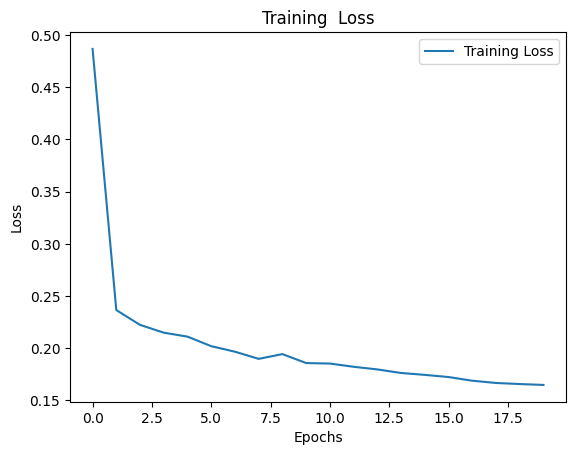

In [ ]:
y_pred = model.predict([X_test0, d_test_seq])

test_rmse = mean_squared_error(y_test0, y_pred, squared=False)
print("Test RMSE:", test_rmse)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training  Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(y_pred)

[[35.54521 ]
 [35.355434]
 [35.30707 ]
 ...
 [35.556618]
 [33.201122]
 [33.195618]]
